In [1]:
import matplotlib.pyplot as plt
from scipy.linalg import expm, ishermitian

import numpy as np
np.set_printoptions(linewidth=np.inf, precision=2)

In [4]:

def e_n(n, d):
    # Creates a d-dimensional vector with 1 at the n-th position and 0 elsewhere
    vec = np.zeros(d)
    vec[n%d] = 1
    return vec

In [5]:
#Ternary detph 1 tree

def add_conj(mat):
    return mat + mat.conj().T

def H_cell(phi,U):
    #0,5,9,12,14 are the doubly occupied states
    mat = np.zeros((15,15),dtype="complex128")
    
    #hopping from double alpha
    mat[0,0] = U/2
    mat[0,1] = np.sqrt(2)*np.exp(-1j*phi/2)
    mat[0,2] = np.sqrt(2)
    mat[0,3] = np.sqrt(2)*np.exp(1j*phi/2)

    #hopping from alpha beta
    mat[1,4] = np.exp(-1j*phi/2)
    mat[1,6] = 1
    mat[1,7] = np.exp(1j*phi/2)

    #hopping from alpha gamma
    mat[2,4] = 1
    mat[2,6] = np.exp(-1j *phi/2)
    mat[2,10] = np.exp(1j *phi/2)

    #hopping from alpha delta
    mat[3,4] = np.exp(1j *phi/2)
    mat[3,6] = np.exp(-1j *phi/2)
    mat[3,10] = 1

    #hopping from alpha epsilon
    mat[4,8] = np.exp(-1j *phi/2)
    mat[4,11] = 1
    mat[4,13] = np.exp(1j *phi/2)

    #hopping from double beta
    mat[5,5] = U/2
    mat[5,2] = np.sqrt(2)*np.exp(1j*phi/2)
    mat[5,8] = np.sqrt(2)*np.exp(-1j*phi/2)

    #hopping from beta gamma
    mat[6,8] = 1
    mat[6,11] = np.exp(-1j*phi/2)

    #hopping from beta delta
    mat[7,8] = np.exp(1j*phi/2)
    mat[7,13] = np.exp(-1j*phi/2)

    #hopping from double gamma
    mat[9,9] = U/2
    mat[9,2] = np.sqrt(2)
    mat[9,11] = np.sqrt(2)

    #hopping from gamma delta
    mat[10,11] = np.exp(1j*phi/2)

    #hopping from double delta
    mat[12,12] = U/2
    mat[12,3] = np.sqrt(2)*np.exp(-1j*phi/2)
    mat[12,13] = np.sqrt(2)*np.exp(1j*phi/2)

    #hopping from double epsilon
    mat[14,14] = U/2
    mat[14,8] = np.sqrt(2)*np.exp(1j*phi/2)
    mat[14,11] = np.sqrt(2)
    mat[14,13] = np.sqrt(2)*np.exp(-1j*phi/2)
    
    return add_conj(mat)

N = 15
n_alpha = 2*np.outer(e_n(0,N),e_n(0,N)) + np.outer(e_n(1,N),e_n(1,N)) + np.outer(e_n(2,N),e_n(2,N)) + np.outer(e_n(3,N),e_n(3,N))+ np.outer(e_n(4,N),e_n(4,N))
n_beta = 2*np.outer(e_n(5,N),e_n(5,N)) + np.outer(e_n(1,N),e_n(1,N)) + np.outer(e_n(6,N),e_n(6,N)) + np.outer(e_n(7,N),e_n(7,N)) + np.outer(e_n(8,N),e_n(8,N)) 
n_gamma = 2*np.outer(e_n(9,N),e_n(9,N)) + np.outer(e_n(2,N),e_n(2,N)) + np.outer(e_n(7,N),e_n(7,N)) + np.outer(e_n(10,N),e_n(10,N)) + np.outer(e_n(11,N),e_n(11,N))
n_delta = 2*np.outer(e_n(12,N),e_n(12,N)) + np.outer(e_n(3,N),e_n(3,N)) + np.outer(e_n(7,N),e_n(7,N)) + np.outer(e_n(10,N),e_n(10,N)) + np.outer(e_n(13,N),e_n(13,N))
n_epsilon = 2*np.outer(e_n(14,N),e_n(14,N)) + np.outer(e_n(4,N),e_n(4,N)) + np.outer(e_n(8,N),e_n(8,N)) + np.outer(e_n(11,N),e_n(11,N)) + np.outer(e_n(13,N),e_n(13,N))



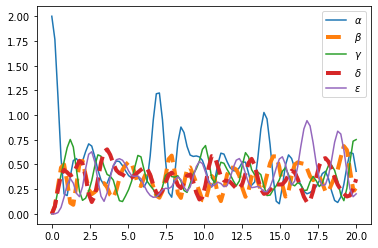

In [9]:
ham = H_cell(np.pi,0)
N = np.shape(ham)[1]
T = 20
steps = 100
init_states = [e_n(0,N)]#[1/np.sqrt(2) * (e_n(0,N) +e_n(N-1,N) )]

for idx, state in enumerate(init_states):
    time = np.linspace(0,T,steps)
    supp_a = []
    supp_b = []
    supp_c = []
    supp_d = []
    supp_e = []


    for t in time:
        supp_a.append( np.abs(state.conj().T @  expm(-1j * t * ham) @ n_alpha @ expm(1j * t * ham) @ state))
        supp_b.append( np.abs(state.conj().T @  expm(-1j * t * ham) @ n_beta @ expm(1j * t * ham) @ state))
        supp_c.append( np.abs(state.conj().T @  expm(-1j * t * ham) @ n_gamma @ expm(1j * t * ham) @ state))
        supp_d.append( np.abs(state.conj().T @  expm(-1j * t * ham) @ n_delta @ expm(1j * t * ham) @ state))
        supp_e.append( np.abs(state.conj().T @  expm(-1j * t * ham) @ n_epsilon @ expm(1j * t * ham) @ state))

        

        
plt.plot(time,supp_a,label=r"$\alpha$")
plt.plot(time,supp_b,label=r"$\beta$",linestyle="--",lw=4)
plt.plot(time,supp_c,label=r"$\gamma$")
plt.plot(time,supp_d,label=r"$\delta$",linestyle="--",lw=4)
plt.plot(time,supp_e,label=r"$\epsilon$")


plt.legend()

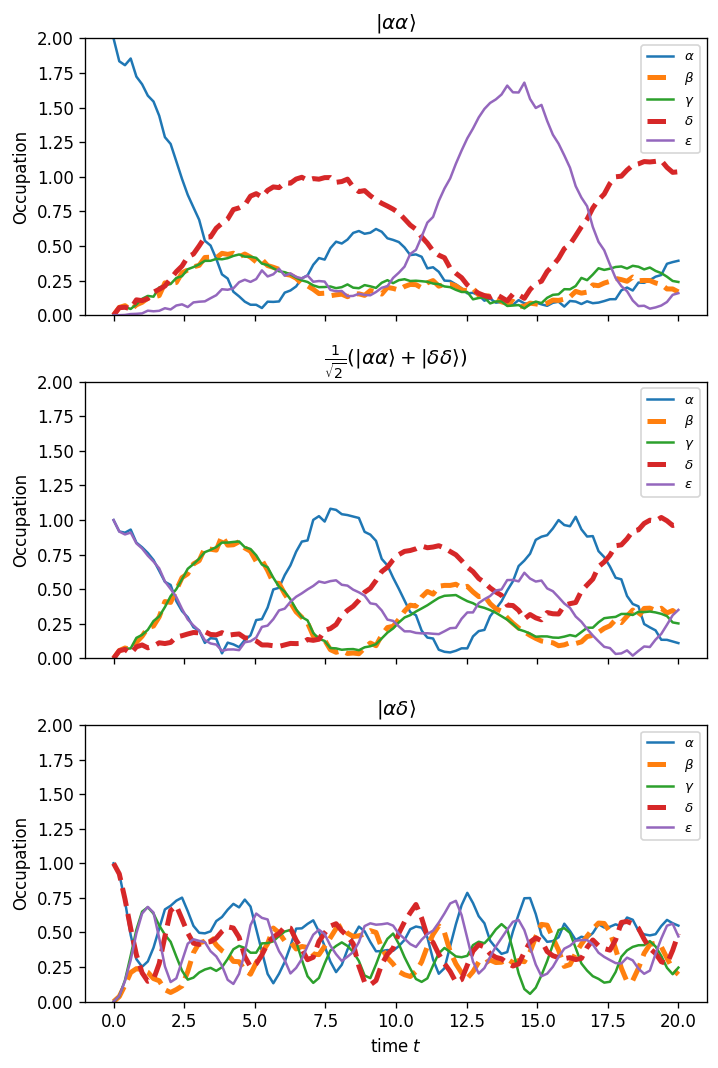

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# --- parameters & Hamiltonian ------------------------------------------------
phi = 4*np.pi/3
U = 10
ham  = H_cell(phi, U)
N    = ham.shape[1]

T     = 20          # total evolution time
steps = 100         # number of time samples
time  = np.linspace(0, T, steps)

# ----------------------------------------------------------------------------- 
# add as many states here as you wish
init_states = [
    e_n(0, N),
    1/np.sqrt(2) * (e_n(0, N) + e_n(N-1, N)),
    e_n(3, N)
]
state_labels = [r"$ | \alpha \alpha \rangle$", r"$\frac{1}{\sqrt{2}}( | \alpha \alpha \rangle + | \delta \delta \rangle )$", r"$ | \alpha \delta \rangle$"]


# --- plotting ---------------------------------------------------------------
n_states              = len(init_states)
fig, axes             = plt.subplots(n_states, 1,
                                     figsize=(6, 3*n_states),
                                     sharex=True, dpi=120)
axes = np.atleast_1d(axes)            # ensures iterable even if n_states = 1

for idx, (state, ax) in enumerate(zip(init_states, axes), start=1):
    supp_a, supp_b, supp_c, supp_d,supp_e = [], [], [], [], []

    for t in time:
        U    = expm(-1j * t * ham)     # U(t)
        Udag = U.conj().T              # U†(t)

        supp_a.append(abs(state.conj().T @ U @ n_alpha  @ Udag @ state))
        supp_b.append(abs(state.conj().T @ U @ n_beta   @ Udag @ state))
        supp_c.append(abs(state.conj().T @ U @ n_gamma  @ Udag @ state))
        supp_d.append(abs(state.conj().T @ U @ n_delta  @ Udag @ state))
        supp_e.append(abs(state.conj().T @ U @ n_epsilon  @ Udag @ state))


    # draw the four curves for this initial state
    ax.plot(time, supp_a, label=r"$\alpha$")
    ax.plot(time, supp_b, label=r"$\beta$", linestyle="--", lw=3)
    ax.plot(time, supp_c, label=r"$\gamma$")
    ax.plot(time, supp_d, label=r"$\delta$", linestyle="--", lw=3)
    ax.plot(time, supp_e, label=r"$\epsilon$")

    ax.set_ylim(0,2)

    ax.set_ylabel("Occupation")
    ax.set_title(state_labels[idx-1])
    ax.legend(fontsize=8)

# shared x-axis label on bottom subplot only
axes[-1].set_xlabel("time $t$")
fig.tight_layout()

plt.show()


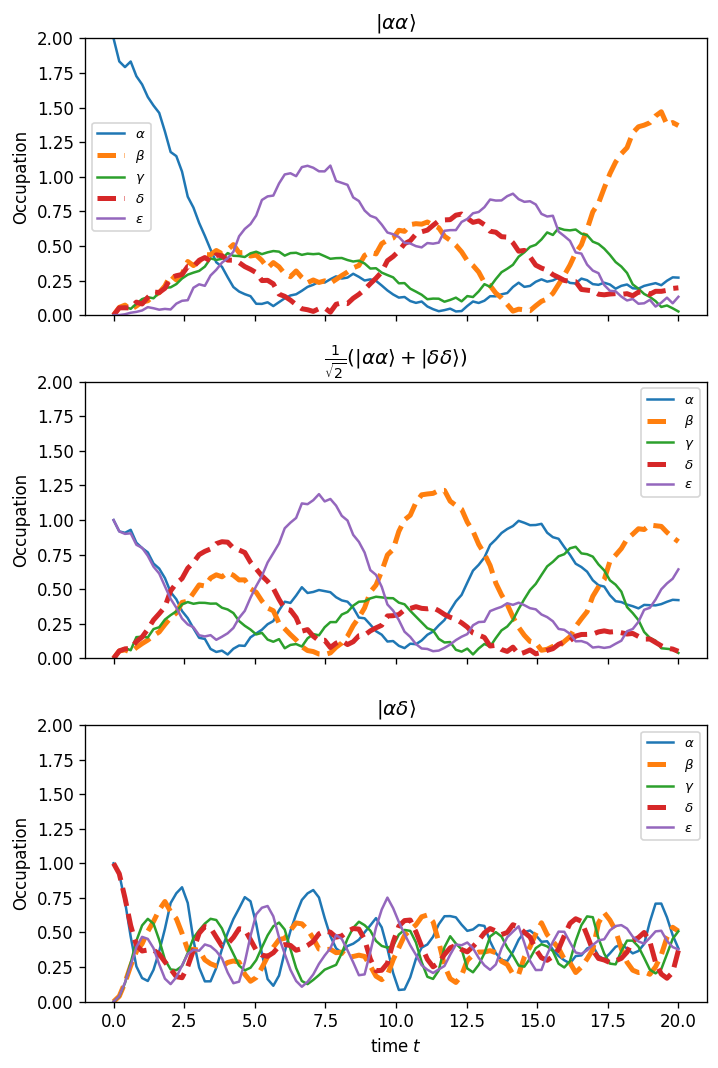

In [11]:
ham  = H_cell(np.pi, 10)
N    = ham.shape[1]

T     = 20          # total evolution time
steps = 100         # number of time samples
time  = np.linspace(0, T, steps)

# ----------------------------------------------------------------------------- 
# add as many states here as you wish
init_states = [
    e_n(0, N),
    1/np.sqrt(2) * (e_n(0, N) + e_n(N-1, N)),
    e_n(3, N)
]

state_labels = [r"$ | \alpha \alpha \rangle$", r"$\frac{1}{\sqrt{2}}( | \alpha \alpha \rangle + | \delta \delta \rangle )$", r"$ | \alpha \delta \rangle$"]

# --- plotting ---------------------------------------------------------------
n_states              = len(init_states)
fig, axes             = plt.subplots(n_states, 1,
                                     figsize=(6, 3*n_states),
                                     sharex=True, dpi=120)
axes = np.atleast_1d(axes)            # ensures iterable even if n_states = 1

for idx, (state, ax) in enumerate(zip(init_states, axes), start=1):
    supp_a, supp_b, supp_c, supp_d,supp_e = [], [], [], [], []

    for t in time:
        U    = expm(-1j * t * ham)     # U(t)
        Udag = U.conj().T              # U†(t)

        supp_a.append(abs(state.conj().T @ U @ n_alpha  @ Udag @ state))
        supp_b.append(abs(state.conj().T @ U @ n_beta   @ Udag @ state))
        supp_c.append(abs(state.conj().T @ U @ n_gamma  @ Udag @ state))
        supp_d.append(abs(state.conj().T @ U @ n_delta  @ Udag @ state))
        supp_e.append(abs(state.conj().T @ U @ n_epsilon  @ Udag @ state))


    # draw the four curves for this initial state
    ax.plot(time, supp_a, label=r"$\alpha$")
    ax.plot(time, supp_b, label=r"$\beta$", linestyle="--", lw=3)
    ax.plot(time, supp_c, label=r"$\gamma$")
    ax.plot(time, supp_d, label=r"$\delta$", linestyle="--", lw=3)
    ax.plot(time, supp_e, label=r"$\epsilon$")

    ax.set_ylim(0,2)

    ax.set_ylabel("Occupation")
    ax.set_title(state_labels[idx-1])
    ax.legend(fontsize=8)


# shared x-axis label on bottom subplot only
axes[-1].set_xlabel("time $t$")
fig.tight_layout()
plt.show()

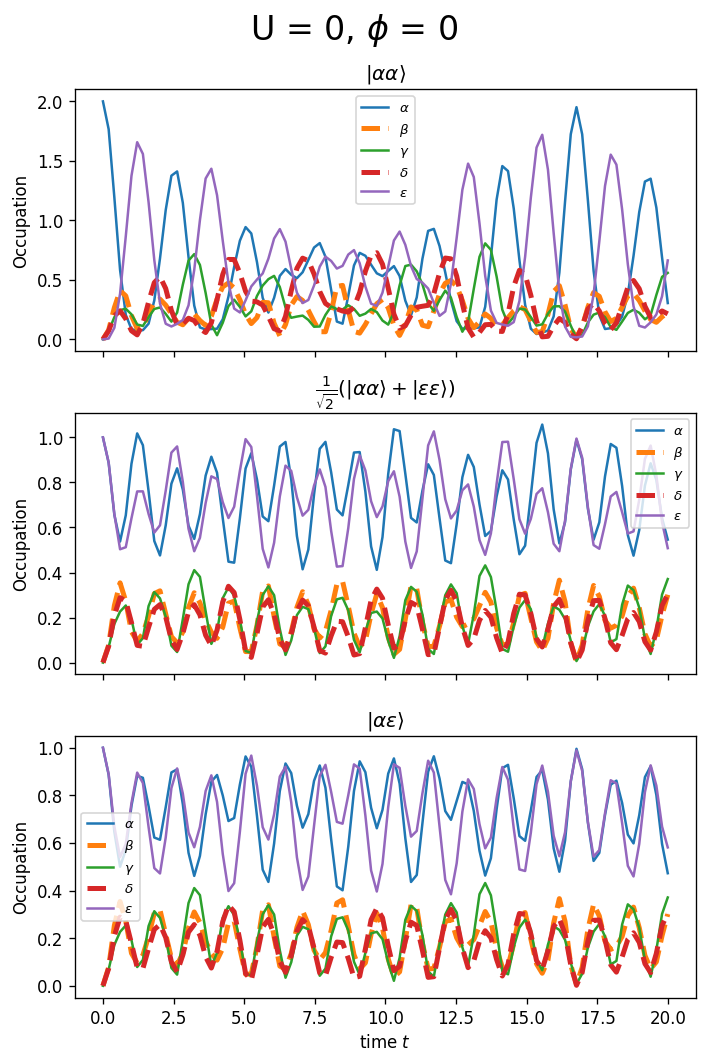

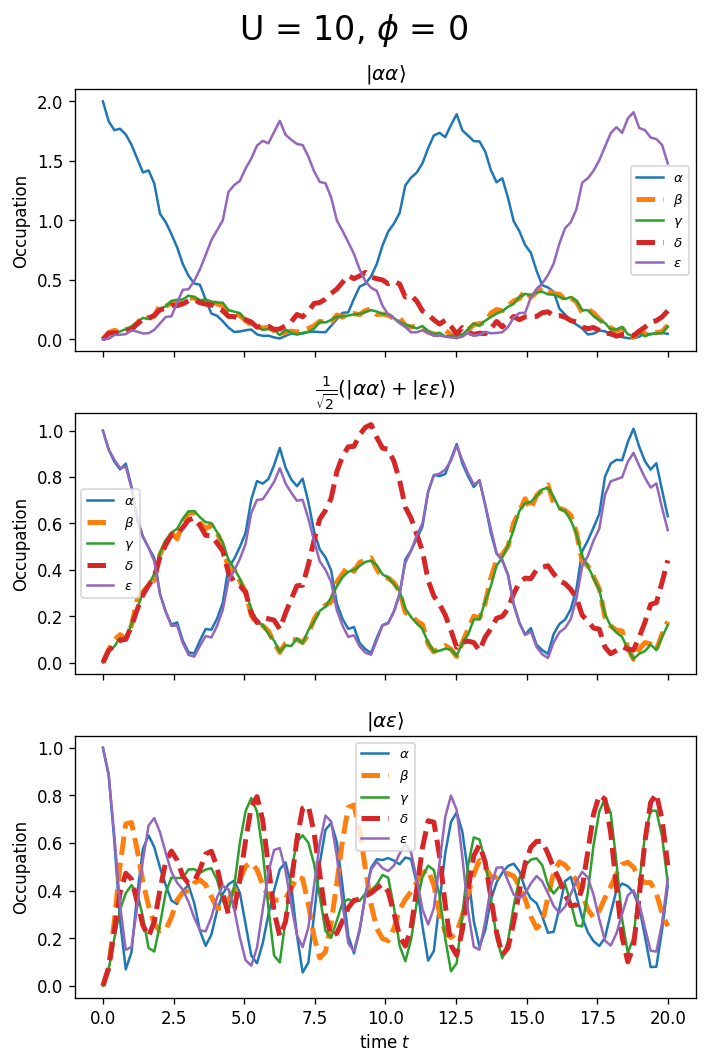

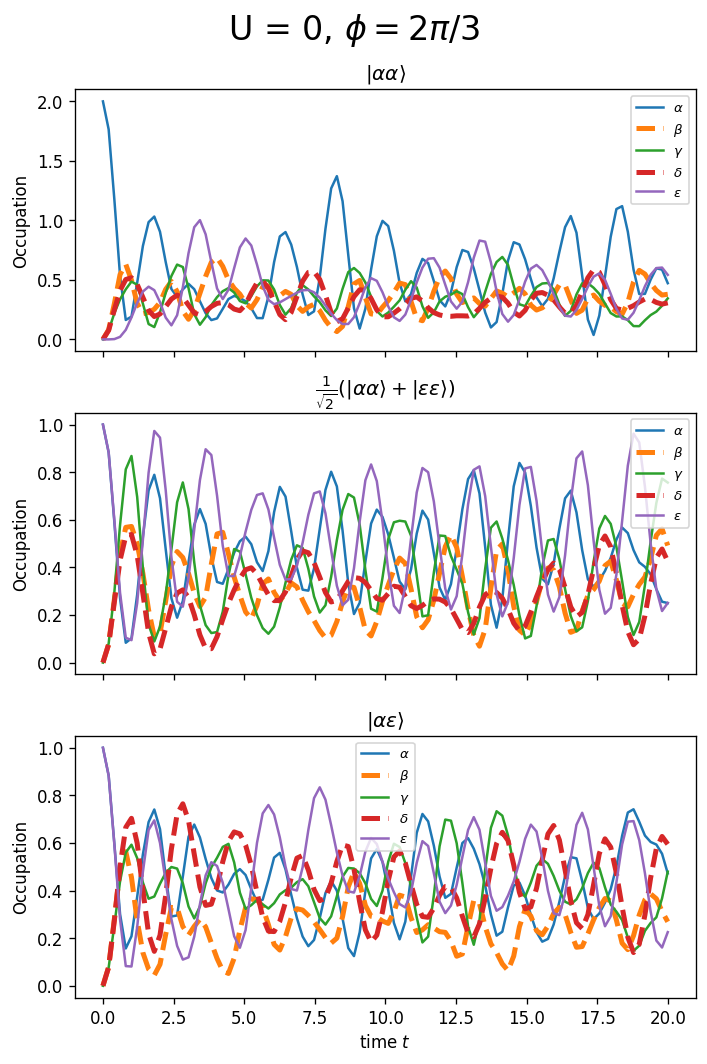

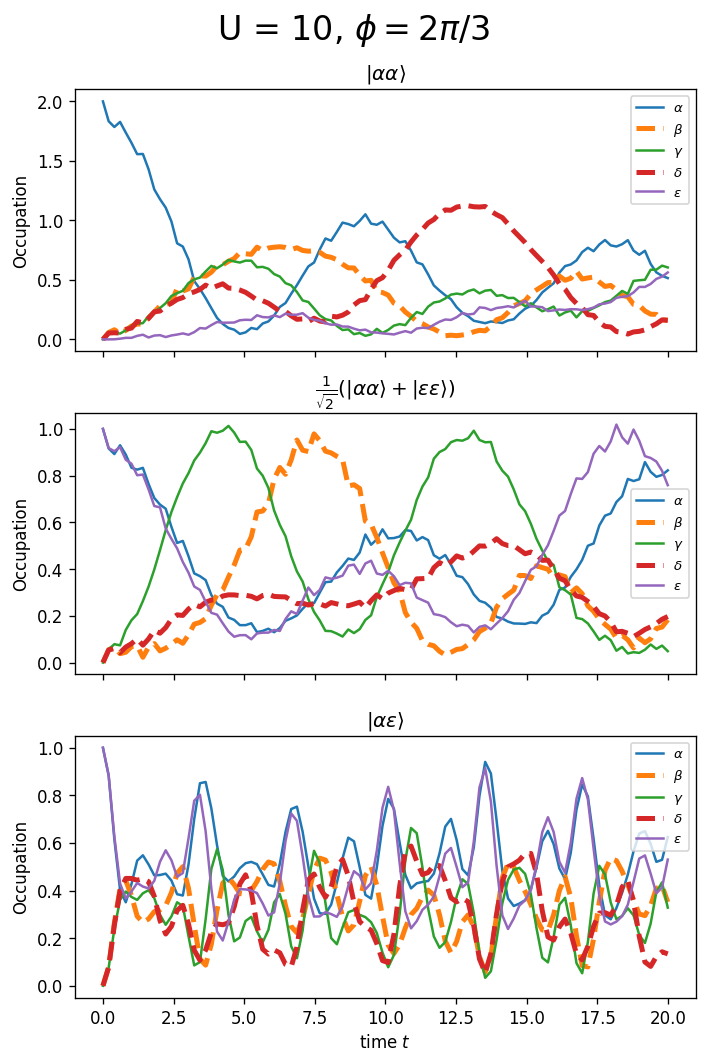

In [14]:


phis = [0,0,2*np.pi/3,2*np.pi/3]
Us = [0,10,0,10]
titles=["0U0phi_sing.pdf","10U0phi_sing.pdf","0Upiphi_sing.pdf","10Upiphi_sing.pdf"]

for i in range(len(phis)):
    # --- parameters & Hamiltonian ------------------------------------------------
    ham  = H_cell(phis[i], Us[i])
    N    = ham.shape[1]

    T     = 20          # total evolution time
    steps = 100         # number of time samples
    time  = np.linspace(0, T, steps)

    # ----------------------------------------------------------------------------- 
    # add as many states here as you wish
    init_states = [
        e_n(0, N),
        1/np.sqrt(2) * (e_n(0, N) + e_n(N-1, N)),
        e_n(4, N)
    ]
    state_labels = [r"$ | \alpha \alpha \rangle$", r"$\frac{1}{\sqrt{2}}( | \alpha \alpha \rangle + | \epsilon \epsilon \rangle )$", r"$ | \alpha \epsilon \rangle$"]


    # --- plotting ---------------------------------------------------------------
    n_states              = len(init_states)
    fig, axes             = plt.subplots(n_states, 1,
                                        figsize=(6, 3*n_states),
                                        sharex=True, dpi=120)
    axes = np.atleast_1d(axes)            # ensures iterable even if n_states = 1
    if phis[i] == 0:
        fig.suptitle(f"U = {Us[i]}, $\phi$ = 0",fontsize=20)
    else:
        fig.suptitle(f"U = {Us[i]}, $\phi = 2\pi$/3",fontsize=20)

    for idx, (state, ax) in enumerate(zip(init_states, axes), start=1):
        supp_a, supp_b, supp_c, supp_d, supp_e = [], [], [], [], []

        for t in time:
            U    = expm(-1j * t * ham)     # U(t)
            Udag = U.conj().T              # U†(t)

            supp_a.append(abs(state.conj().T @ U @ n_alpha  @ Udag @ state))
            supp_b.append(abs(state.conj().T @ U @ n_beta   @ Udag @ state))
            supp_c.append(abs(state.conj().T @ U @ n_gamma  @ Udag @ state))
            supp_d.append(abs(state.conj().T @ U @ n_delta  @ Udag @ state))
            supp_e.append(abs(state.conj().T @ U @ n_epsilon  @ Udag @ state))


        # draw the four curves for this initial state
        ax.plot(time, supp_a, label=r"$\alpha$")
        ax.plot(time, supp_b, label=r"$\beta$", linestyle="--", lw=3)
        ax.plot(time, supp_c, label=r"$\gamma$")
        ax.plot(time, supp_d, label=r"$\delta$", linestyle="--", lw=3)
        ax.plot(time, supp_e, label=r"$\epsilon$")

        ax.set_ylabel("Occupation")
        ax.set_title(state_labels[idx-1])
        ax.legend(fontsize=8)

    # shared x-axis label on bottom subplot only
    axes[-1].set_xlabel("time $t$")
    fig.tight_layout()

    plt.savefig(titles[i])
